## **ABSTRACT**

The used and refurbished device market has grown considerably over the past decade as it provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. Here is a sample dataset of normalized used and new pricing data of refurbished / used devices.

**DataSet**

Variables:

*   device_brand: Name of manufacturing brand
*   os: OS on which the device runs
*   screen_size: Size of the screen in cm
*   4g: Whether 4G is available or not
*   5g: Whether 5G is available or not
*   front_camera_mp: Resolution of the rear camera in megapixels
*   back_camera_mp: Resolution of the front camera in megapixels

*   internal_memory: Amount of internal memory (ROM) in GB
*   ram: Amount of RAM in GB


*   battery: Energy capacity of the device battery in mAh

*   weight: Weight of the device in grams
*   release_year: Year when the device model was released

*   days_used: Number of days the used/refurbished device has been used
*   normalized_new_price: Normalized price of a new device of the same model

*   normalized_used_price (TARGET): Normalized price of the used/refurbished device






























Numerical Datatypes:

*   screen_size: Size of the screen in cm

*   front_camera_mp: Resolution of the rear camera in megapixels
*   back_camera_mp: Resolution of the front camera in megapixels

*   internal_memory: Amount of internal memory (ROM) in GB
*   ram: Amount of RAM in GB


*   battery: Energy capacity of the device battery in mAh

*   weight: Weight of the device in grams
*   release_year: Year when the device model was released

*   days_used: Number of days the used/refurbished device has been used
*   normalized_new_price: Normalized price of a new device of the same model

*   normalized_used_price (TARGET): Normalized price of the used/refurbished device

Categorical:

*   device_brand: Name of manufacturing brand
*   os: OS on which the device runs
*   4g: Whether 4G is available or not
*   5g: Whether 5G is available or not



**Installing dependencies**

In [234]:

!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [235]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Read Data**

In [236]:
data = pd.read_csv("used_device_data.csv")

In [237]:

data.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


**Get some facts about data**

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [239]:
data.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


**Checking for null values** 

In [240]:

data.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [241]:
!pip install missingno
import missingno as mno



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


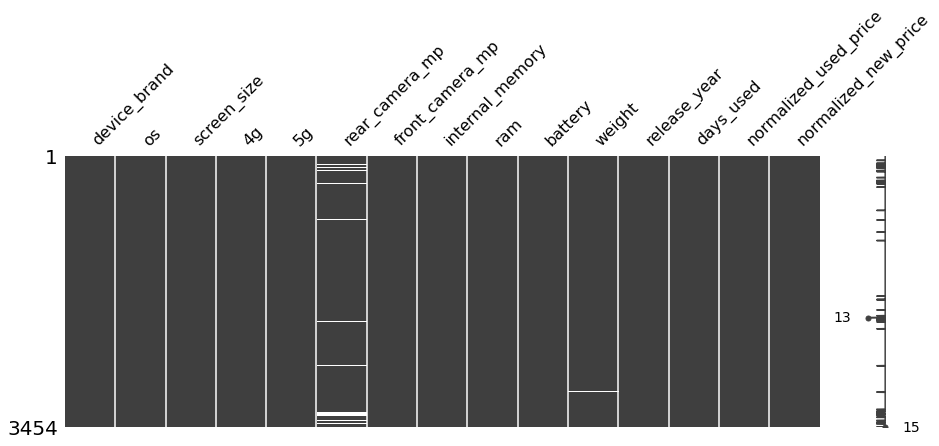

In [242]:
mno.matrix(data, figsize = (15, 5))

here, we can see there are considerable missing values in 'rear_camera_mp' and 'weight'


**Simple Random Imputation** (we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively.
Ref: https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression/notebook

**Performing Random Imputation**

In [243]:
def random_imputation(data, feature):

    number_missing = data[feature].isnull().sum()
    observed_values = data.loc[data[feature].notnull(), feature]
    data.loc[data[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return data

In [244]:
missing_columns = ["rear_camera_mp", "front_camera_mp", "internal_memory", "ram", "battery","weight"]

In [245]:
for feature in missing_columns:
    data[feature + '_imp'] = data[feature]
    data = random_imputation(data, feature)

In [246]:
data.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
rear_camera_mp_imp         0
front_camera_mp_imp        0
internal_memory_imp        0
ram_imp                    0
battery_imp                0
weight_imp                 0
dtype: int64

In [247]:
print(data.columns)

Index(['device_brand', 'os', 'screen_size', '4g', '5g', 'rear_camera_mp',
       'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price', 'rear_camera_mp_imp', 'front_camera_mp_imp',
       'internal_memory_imp', 'ram_imp', 'battery_imp', 'weight_imp'],
      dtype='object')


In [248]:
unique_values = data['device_brand'].unique()


In [249]:
unique_values

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

checking for duplicate values 

In [250]:
data.duplicated().sum()



0

Now, our duplicate values are handled, missing values are handled, what's pending from us making some analysis and understanding some patterns?
Well, for starters, our 
Device brand, 
OS, 
4G, 
5G 
& release_year are still in some other data type than the one that would be easy for us. 

So, our first step would be: Deal with 4G, 5G using ONE HOT ENCODING.

**Mapping Categorical Features 4G, 5G**

In [251]:
dict_G = {'yes':1,'no':0}

In [252]:
data['4g'] = data['4g'].map(dict_G)

In [253]:
data['5g'] = data['5g'].map(dict_G)

Now, we have coded 4G/5G into 0s/1s. Now, lets handle device_brand. Here, now, we are going to map our device brand into median values of each normalised_used_price for each brand.

In [254]:
brand_dict = data.groupby(['device_brand'])['normalized_used_price'].median().to_dict()
data['Device_Brand'] = data['device_brand'].map(brand_dict)

Device brand handling : Done. 

In [255]:
data.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,...,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,...,127,4.307572,4.715100,13.0,5.0,64.0,3.0,3020.0,146.0,4.683326
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,...,325,5.162097,5.519018,13.0,16.0,128.0,8.0,4300.0,213.0,4.683326
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,...,162,5.111084,5.884631,13.0,8.0,128.0,8.0,4200.0,213.0,4.683326
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,...,345,5.135387,5.630961,13.0,8.0,64.0,6.0,7250.0,480.0,4.683326
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,...,293,4.389995,4.947837,13.0,8.0,64.0,3.0,5000.0,185.0,4.683326


Removing all the redundant rows before using Dummys to get different OS values into categorical features

In [256]:
data = data[['os','screen_size', '4g','5g', 'release_year', 'days_used', 
             'normalized_used_price', 'normalized_new_price', 'rear_camera_mp_imp', 
             'front_camera_mp_imp', 'internal_memory_imp',
             'ram_imp', 'battery_imp', 'weight_imp', 'Device_Brand']]

In [257]:
data.head()

,os,screen_size,4g,5g,release_year,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand
0,Android,14.50,1,0,2020,127,4.307572,4.715100,13.0,5.0,64.0,3.0,3020.0,146.0,4.683326
1,Android,17.30,1,1,2020,325,5.162097,5.519018,13.0,16.0,128.0,8.0,4300.0,213.0,4.683326
2,Android,16.69,1,1,2020,162,5.111084,5.884631,13.0,8.0,128.0,8.0,4200.0,213.0,4.683326
3,Android,25.50,1,1,2020,345,5.135387,5.630961,13.0,8.0,64.0,6.0,7250.0,480.0,4.683326
4,Android,15.32,1,0,2020,293,4.389995,4.947837,13.0,8.0,64.0,3.0,5000.0,185.0,4.683326


Using Dummies to encode OS into numerical features

In [258]:
data = pd.get_dummies(data)

In [259]:
data.head()

,screen_size,4g,5g,release_year,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand,os_Android,os_Others,os_Windows,os_iOS
0,14.50,1,0,2020,127,4.307572,4.715100,13.0,5.0,64.0,3.0,3020.0,146.0,4.683326,1,0,0,0
1,17.30,1,1,2020,325,5.162097,5.519018,13.0,16.0,128.0,8.0,4300.0,213.0,4.683326,1,0,0,0
2,16.69,1,1,2020,162,5.111084,5.884631,13.0,8.0,128.0,8.0,4200.0,213.0,4.683326,1,0,0,0
3,25.50,1,1,2020,345,5.135387,5.630961,13.0,8.0,64.0,6.0,7250.0,480.0,4.683326,1,0,0,0
4,15.32,1,0,2020,293,4.389995,4.947837,13.0,8.0,64.0,3.0,5000.0,185.0,4.683326,1,0,0,0


In [260]:
data.isnull().sum()

screen_size              0
4g                       0
5g                       0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
rear_camera_mp_imp       0
front_camera_mp_imp      0
internal_memory_imp      0
ram_imp                  0
battery_imp              0
weight_imp               0
Device_Brand             0
os_Android               0
os_Others                0
os_Windows               0
os_iOS                   0
dtype: int64

Now I can see none of my columns have any missing data

**Now, lets check what are our numerical features and see their distributions**

**1)Q-Q PLOT** 

<Figure size 576x360 with 0 Axes>

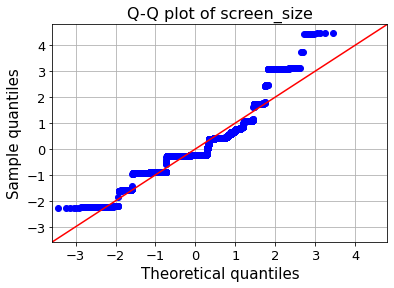

<Figure size 576x360 with 0 Axes>

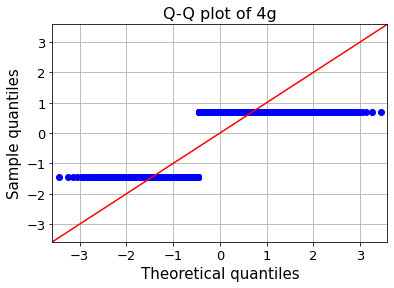

<Figure size 576x360 with 0 Axes>

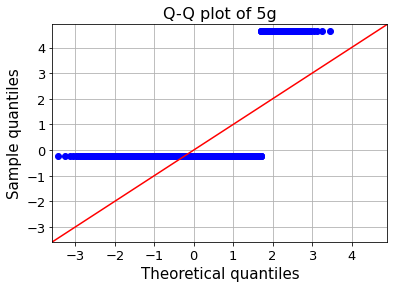

<Figure size 576x360 with 0 Axes>

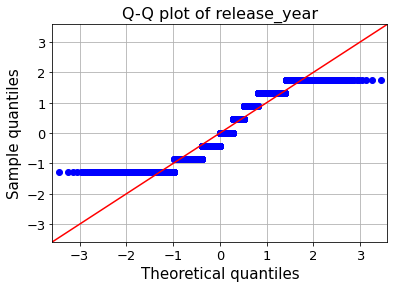

<Figure size 576x360 with 0 Axes>

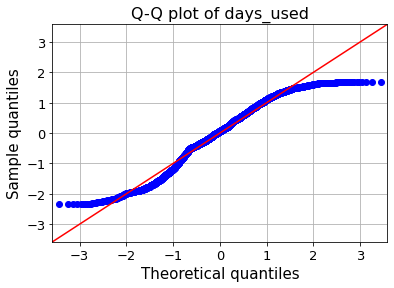

<Figure size 576x360 with 0 Axes>

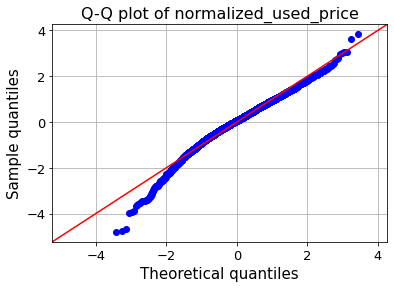

<Figure size 576x360 with 0 Axes>

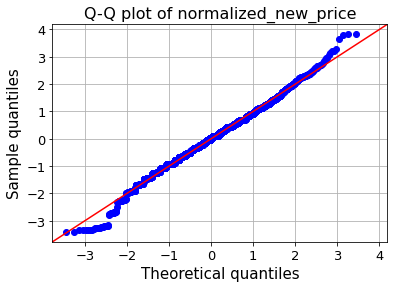

<Figure size 576x360 with 0 Axes>

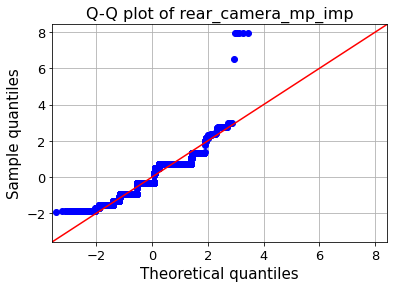

<Figure size 576x360 with 0 Axes>

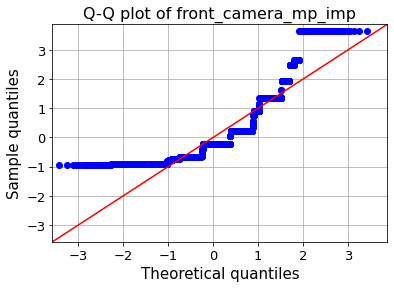

<Figure size 576x360 with 0 Axes>

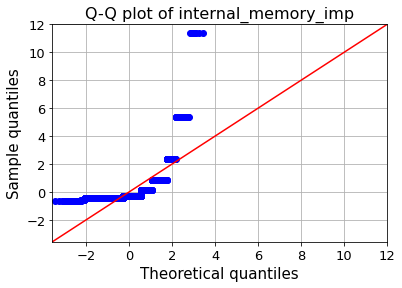

<Figure size 576x360 with 0 Axes>

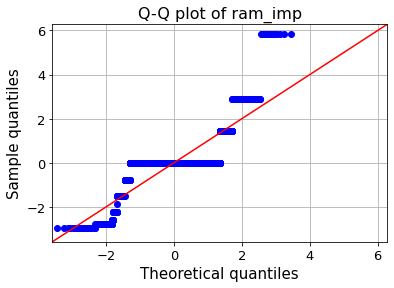

<Figure size 576x360 with 0 Axes>

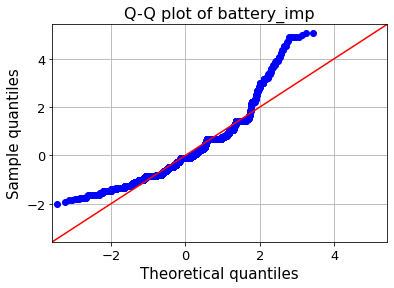

<Figure size 576x360 with 0 Axes>

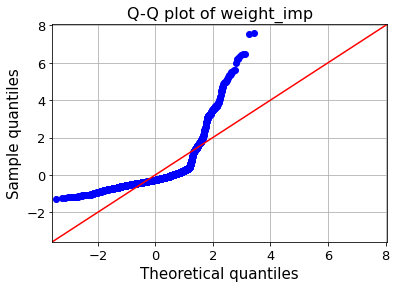

<Figure size 576x360 with 0 Axes>

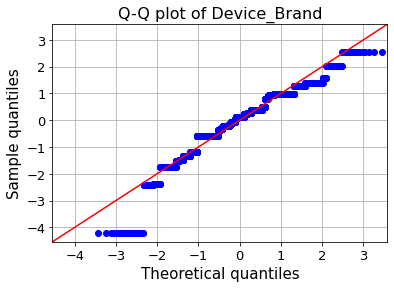

<Figure size 576x360 with 0 Axes>

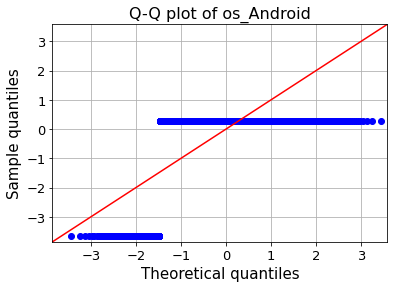

<Figure size 576x360 with 0 Axes>

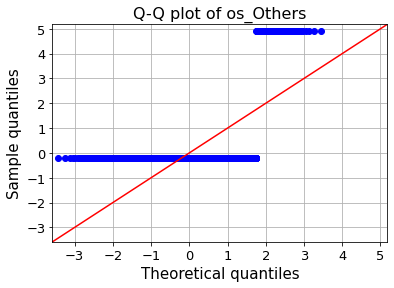

<Figure size 576x360 with 0 Axes>

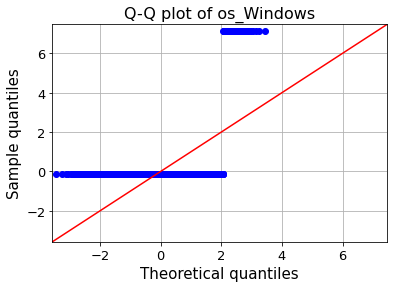

<Figure size 576x360 with 0 Axes>

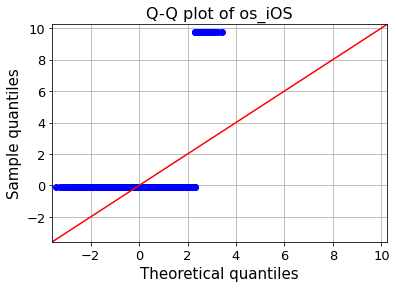

In [261]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

**Intrepretations from Q-Q plot :**
Here, we can see that battery_imp, normalized_new_price, days_used are roughly following normal distribution

**1) Boxplot**

In [262]:
plot_features= data

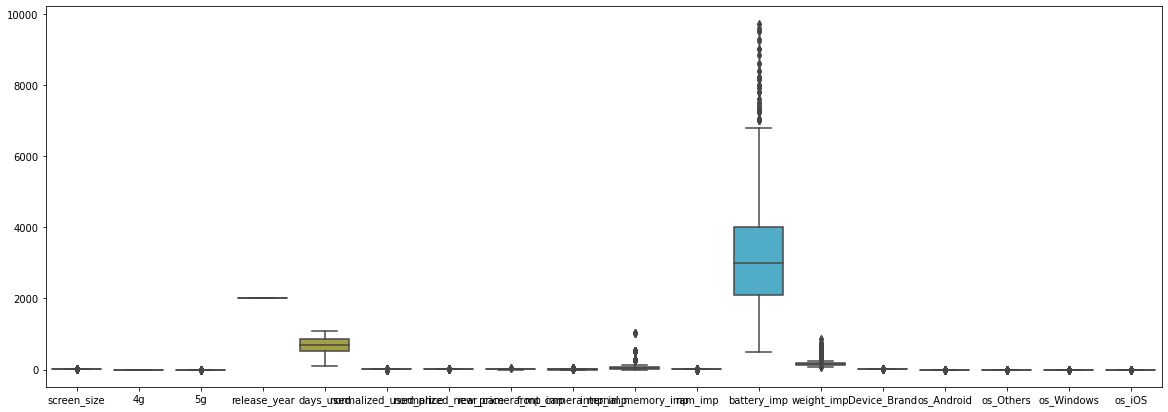

In [263]:
plt.figure(figsize=(20,7))
sns.boxplot(data=plot_features)

 **Interpretation from this:
What to do :**
Here we can see that battery_imp , internam_memory have outliers and batter_imp and release_year have very different scaling than the rest. 
Implies this data has to be scaled. 


**Individual box plot for each of the features**

In [264]:
num_feature=[feature for feature in data.columns if data[feature].dtype!='O']
print(num_feature)

['screen_size', '4g', '5g', 'release_year', 'days_used', 'normalized_used_price', 'normalized_new_price', 'rear_camera_mp_imp', 'front_camera_mp_imp', 'internal_memory_imp', 'ram_imp', 'battery_imp', 'weight_imp', 'Device_Brand', 'os_Android', 'os_Others', 'os_Windows', 'os_iOS']


In [265]:
len(num_feature)

18

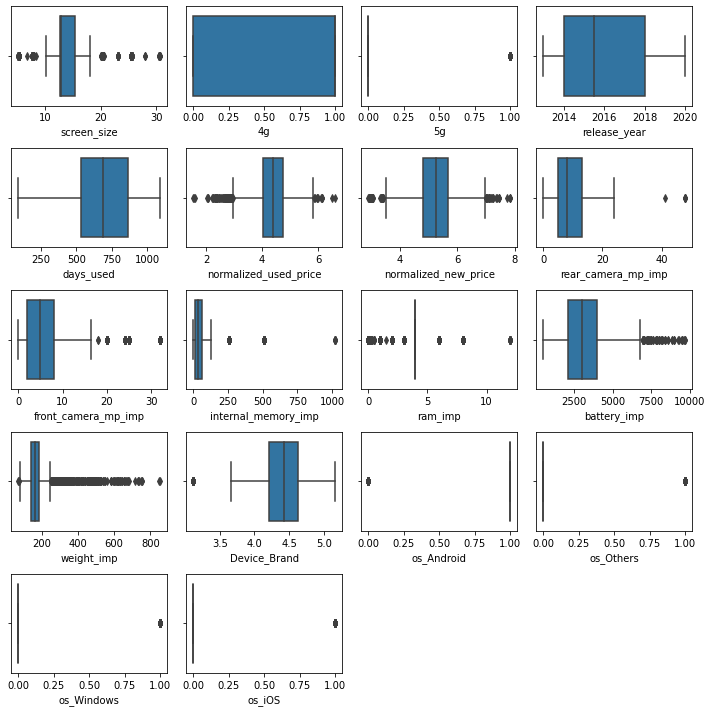

In [266]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(5,4,i+1)
    sns.boxplot(data=data,x=data[num_feature[i]])

plt.tight_layout()
plt.show()

 **Interpretation from this:
What to do :**
Here, we can see that weight_imp, screen_size and normalized_new_price have some outliers


**2) Kernel density estimation by Kdeplot of the numeric columns**

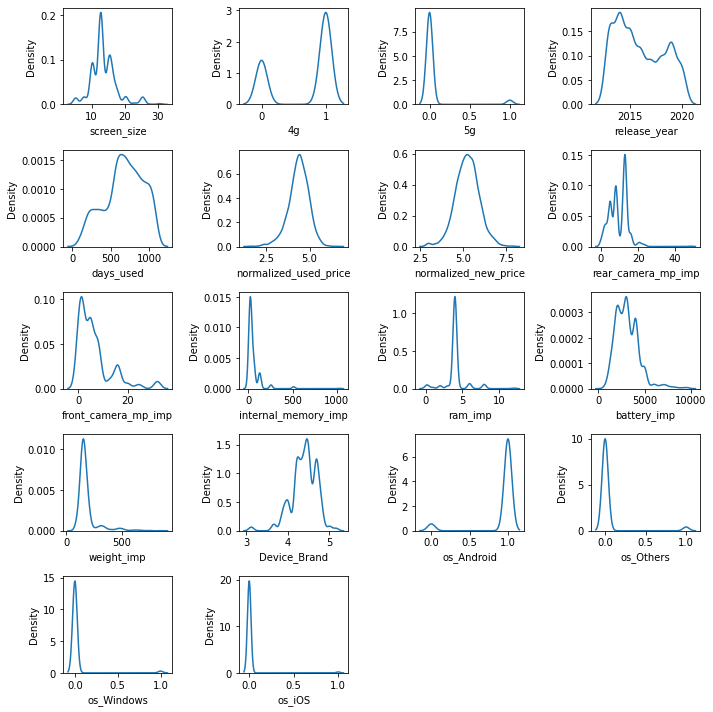

In [267]:
fig = plt.figure(figsize=(10,10))

for i in range(len(num_feature)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(data=data,x=data[num_feature[i]])

plt.tight_layout()
plt.show()


 **Interpretation from this:
What to do :**
Here we can see that except for normalized_new_price & normalized_used_price, none of the other variables follow normal distribution


**Correlation between Target variable and all the features before normalisation**

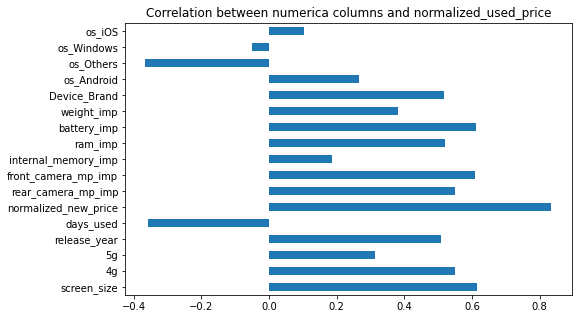

In [268]:
#code by "Rent Price Predication (5 Models)" by PIYUSH KUMARn(https://www.kaggle.com/code/piyushkr303/rent-price-predication-5-models)
plt.figure(figsize=(8, 5))
X = plot_features.drop('normalized_used_price', axis=1)
X.corr(method='spearman')
X.corrwith(plot_features['normalized_used_price']).plot(kind='barh', title="Correlation between numerica columns and normalized_used_price")
plt.show()

From this graph we can see that the correlation between target with normalized_new_price is the highest with 0.8 so it could possibly be our most significant feature
lets normalize these values first and then see how the below graph looks any different then.

In [269]:
data.describe()

,screen_size,4g,5g,release_year,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand,os_Android,os_Others,os_Windows,os_iOS
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,0.676028,0.044007,2015.965258,674.869716,4.364712,5.233107,9.480017,6.552490,54.662765,4.035790,3131.318037,182.713550,4.392271,0.930515,0.039664,0.019398,0.010423
std,3.805280,0.468057,0.205140,2.298455,248.580166,0.588914,0.683637,4.852148,6.968815,85.013148,1.364428,1299.832604,88.339227,0.303492,0.254313,0.195197,0.137939,0.101573
min,5.080000,0.000000,0.000000,2013.000000,91.000000,1.536867,2.901422,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,3.116622,0.000000,0.000000,0.000000,0.000000
25%,12.700000,0.000000,0.000000,2014.000000,533.500000,4.033931,4.790342,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,4.210719,1.000000,0.000000,0.000000,0.000000
50%,12.830000,1.000000,0.000000,2015.500000,690.500000,4.405133,5.245892,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,4.423648,1.000000,0.000000,0.000000,0.000000
75%,15.340000,1.000000,0.000000,2018.000000,868.750000,4.755700,5.673718,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,4.634435,1.000000,0.000000,0.000000,0.000000
max,30.710000,1.000000,1.000000,2020.000000,1094.000000,6.619433,7.847841,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,5.166030,1.000000,1.000000,1.000000,1.000000


**Performing Normalization**

**Performing normalization before doing a heatmap for feature selection**

In [270]:
from sklearn import preprocessing
df_scaled = data.astype(float)

# Initialize the scaler
min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform the data
df_scaled = min_max_scaler.fit_transform(df_scaled)

# Convert the scaled data back into a dataframe with the original column names
df_scaled = pd.DataFrame(df_scaled, columns=data.columns)

# Update the original dataframe with the scaled values
data = df_scaled

In [271]:
data.describe()

,screen_size,4g,5g,release_year,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand,os_Android,os_Others,os_Windows,os_iOS
count,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,0.336836,0.676028,0.044007,0.423608,0.582123,0.556381,0.471389,0.196161,0.204765,0.053372,0.335208,0.285392,0.144674,0.622448,0.930515,0.039664,0.019398,0.010423
std,0.148470,0.468057,0.205140,0.328351,0.247837,0.115869,0.138208,0.101255,0.217775,0.083021,0.113892,0.140980,0.112391,0.148088,0.254313,0.195197,0.137939,0.101573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297308,0.000000,0.000000,0.142857,0.441176,0.491300,0.381876,0.102671,0.062500,0.015615,0.332220,0.173536,0.092875,0.533860,1.000000,0.000000,0.000000,0.000000
50%,0.302380,1.000000,0.000000,0.357143,0.597707,0.564334,0.473973,0.165275,0.156250,0.031241,0.332220,0.271150,0.115776,0.637758,1.000000,0.000000,0.000000,0.000000
75%,0.400312,1.000000,0.000000,0.714286,0.775424,0.633309,0.560465,0.269616,0.250000,0.062491,0.332220,0.379610,0.147583,0.740611,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [272]:
plot_features = data

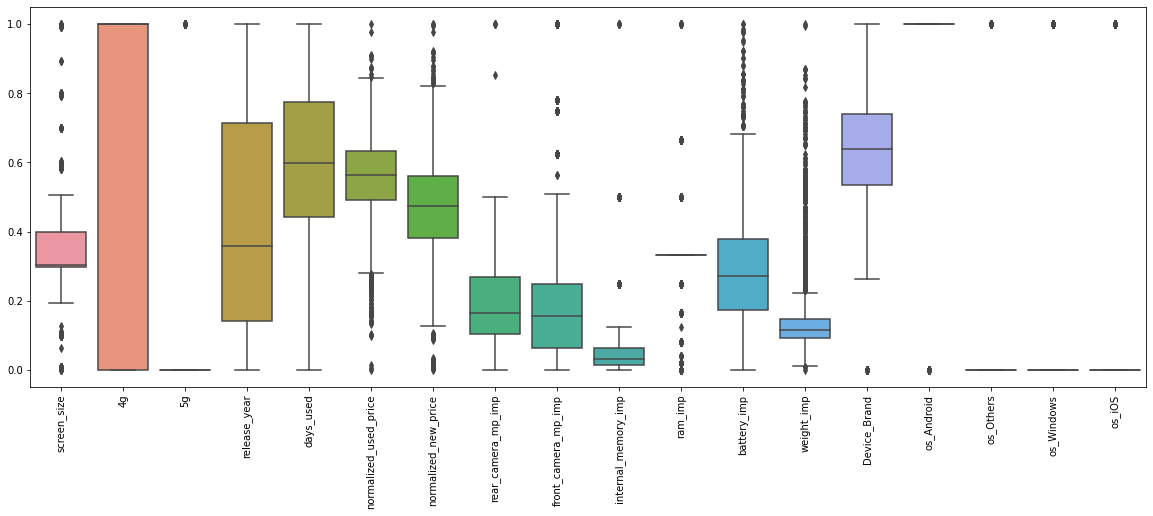

In [273]:
plt.figure(figsize=(20,7))
sns.boxplot(data=plot_features)
plt.xticks(rotation=90)
plt.show()

**Write Interpretations here :**

**Correlation between Target variable and all the features before normalisation**

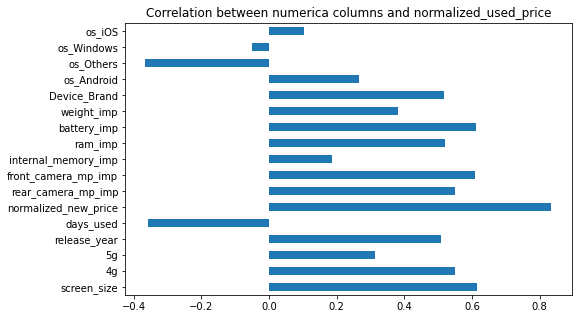

In [274]:
plt.figure(figsize=(8, 5))
X = plot_features.drop('normalized_used_price', axis=1)
X.corr(method='spearman')
X.corrwith(plot_features['normalized_used_price']).plot(kind='barh', title="Correlation between numerica columns and normalized_used_price")
plt.show()

Correlation seems almost the same before and after normalization

**Lets now see correlation between all features in data**

In [275]:
data.corr()

,screen_size,4g,5g,release_year,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand,os_Android,os_Others,os_Windows,os_iOS
screen_size,1.000000,0.259424,0.166163,0.364223,-0.291723,0.614785,0.460889,0.147071,0.271629,0.068583,0.274263,0.811751,0.828798,0.332184,0.258670,-0.347127,-0.065203,0.107991
4g,0.259424,1.000000,0.148527,0.612454,-0.358217,0.550657,0.472451,0.533306,0.487999,0.068668,0.253302,0.394744,0.011621,0.469415,0.161176,-0.198479,-0.068602,0.071046
5g,0.166163,0.148527,1.000000,0.354571,-0.363333,0.313640,0.319735,0.010325,0.389968,0.260570,0.571717,0.204646,0.061073,0.193005,0.058629,-0.043603,-0.030176,-0.022019
release_year,0.364223,0.612454,0.354571,1.000000,-0.750390,0.509790,0.303689,0.320906,0.690518,0.235540,0.313800,0.488686,0.071447,0.420941,0.138558,-0.111826,-0.111141,0.018918
days_used,-0.291723,-0.358217,-0.363333,-0.750390,1.000000,-0.358264,-0.216625,-0.131768,-0.552227,-0.243376,-0.280011,-0.371942,-0.067847,-0.300380,-0.076047,0.035595,0.092034,-0.002986
normalized_used_price,0.614785,0.550657,0.313640,0.509790,-0.358264,1.000000,0.834496,0.551056,0.607496,0.186498,0.519316,0.612665,0.382333,0.518356,0.266355,-0.365215,-0.050207,0.103146
normalized_new_price,0.460889,0.472451,0.319735,0.303689,-0.216625,0.834496,1.000000,0.508845,0.474153,0.192261,0.530808,0.470276,0.269498,0.484938,0.221226,-0.351690,-0.031212,0.164350
rear_camera_mp_imp,0.147071,0.533306,0.010325,0.320906,-0.131768,0.551056,0.508845,1.000000,0.384618,0.015963,0.230200,0.233614,-0.085088,0.345844,0.220019,-0.277283,-0.017464,0.005711
front_camera_mp_imp,0.271629,0.487999,0.389968,0.690518,-0.552227,0.607496,0.474153,0.384618,1.000000,0.294920,0.477330,0.370234,-0.004760,0.425892,0.174210,-0.151666,-0.085145,-0.029085
internal_memory_imp,0.068583,0.068668,0.260570,0.235540,-0.243376,0.186498,0.192261,0.015963,0.294920,1.000000,0.118767,0.116507,0.013974,0.067629,-0.013499,0.022024,-0.042241,0.048836


**HeatMap of correlation**

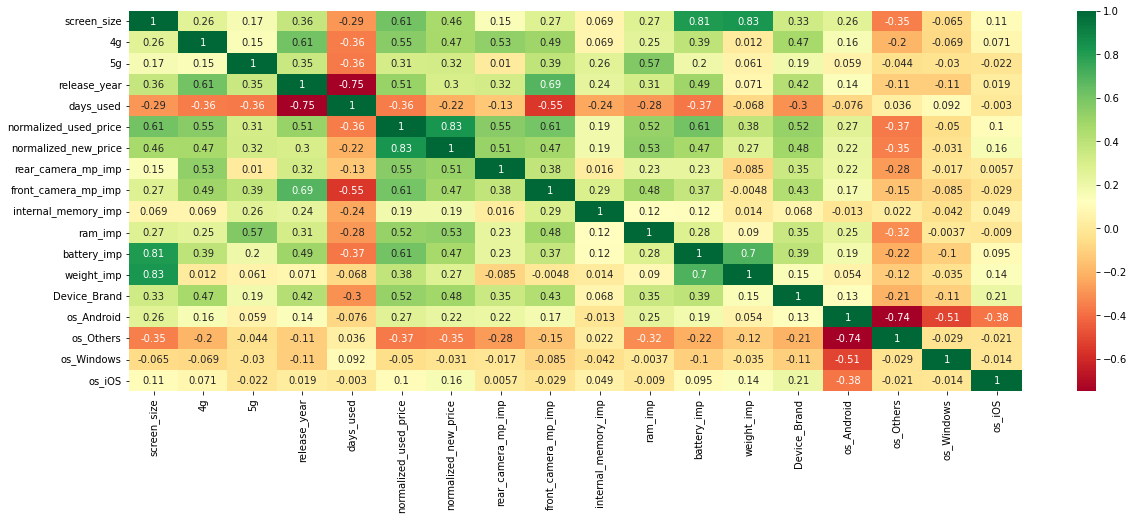

In [276]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

**Write Interpretations here :**
battery_imp(0.81) and weight_imp(0.83) are slightly correlated with screen_size.


## **Identifing predictor significance**

In [277]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['normalized_used_price'], data[['screen_size', '4g', '5g', 'release_year', 
                                                   'days_used',  
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 'internal_memory_imp', 
                                                   'ram_imp', 'battery_imp', 
                                                   'weight_imp', 'Device_Brand', 'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]).fit()

# Print out the statistics
model.summary()
#['screen_size', '4g', '5g', 'release_year', 'days_used', 
 #'normalized_used_price', 'normalized_new_price', 'rear_camera_mp_imp', 
 #'front_camera_mp_imp', 'internal_memory_imp', 'ram_imp', 'battery_imp',
 #'weight_imp', 'Device_Brand', 'os_Android', 'os_Others', 'os_Windows', 'os_iOS']

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.840
Method:                    Least Squares   F-statistic:                     1136.
Date:                   Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                           04:55:28   Log-Likelihood:                 5719.0
No. Observations:                   3454   AIC:                        -1.140e+04
Df Residuals:                       3437   BIC:                        -1.130e+04
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
screen_size              0.1290      0.014      9.254      0.000       0.102       0.156
4g                       0.0093      0.003      3.639      0.000       0.004       0.014
5g                      -0.0062      0.005     -1.212      0.226      -0.016       0.004
release_year             0.0389      0.005      7.549      0.000       0.029       0.049
days_used                0.0094      0.005      1.876      0.061      -0.000       0.019
normalized_new_price     0.4185      0.009     44.820      0.000       0.400       0.437
rear_camera_mp_imp       0.1730      0.011     16.238      0.000       0.152       0.194
front_camera_mp_imp      0.0877      0.006     14.983      0.000       0.076       0.099
internal_memory_imp      0.0045      0.010      0.437      0.662      -0.016       0.025
ram_imp                  0.0463      0.010      4.579      0.000       0.026       0.066
battery_imp             -0.0186      0.011     -1.666      0.096      -0.041       0.003
weight_imp               0.1318      0.017      7.974      0.000       0.099       0.164
Device_Brand             0.0137      0.007      2.020      0.043       0.000       0.027
os_Android               0.1982      0.006     30.843      0.000       0.186       0.211
os_Others                0.1870      0.006     28.818      0.000       0.174       0.200
os_Windows               0.2058      0.008     24.532      0.000       0.189       0.222
os_iOS                   0.1787      0.011     16.064      0.000       0.157       0.200
==============================================================================
Omnibus:                      303.231   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              694.689
Skew:                          -0.539   Prob(JB):                    1.41e-151
Kurtosis:                       4.915   Cond. No.                         44.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Building the model keepingg the outliers


## BUILDING THE MODEL - with outliers

Significant features are: 'screen_size', '4g', '5g', 'release_year',   
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp',  
                                                   'ram_imp', 
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS'

Train Validation and Test split

In [278]:
from sklearn.model_selection import  train_test_split

X = data[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

y = data['normalized_used_price']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

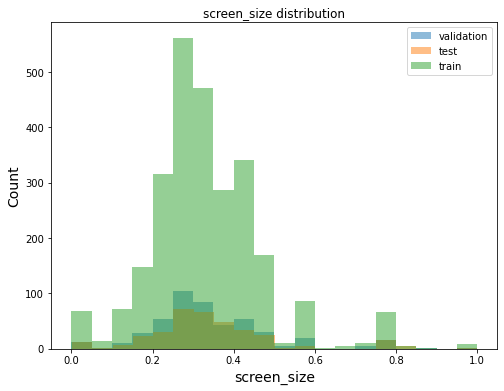

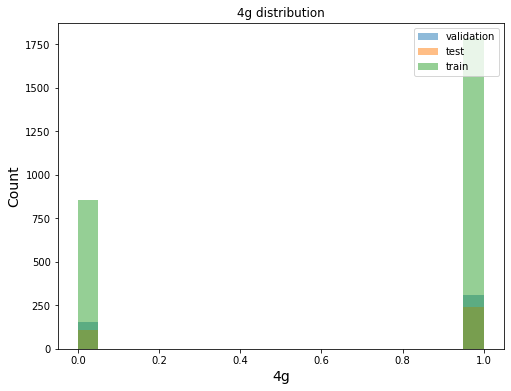

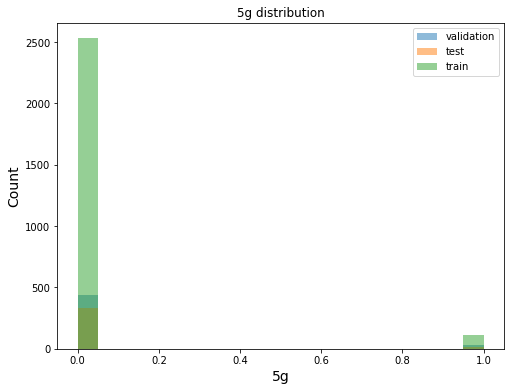

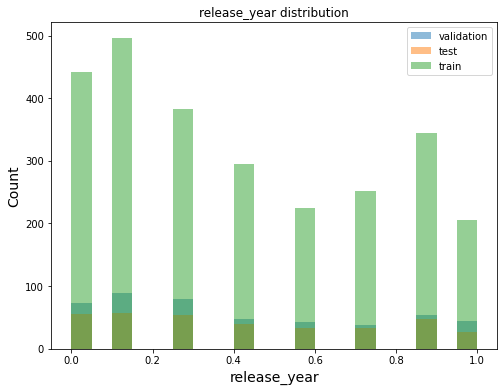

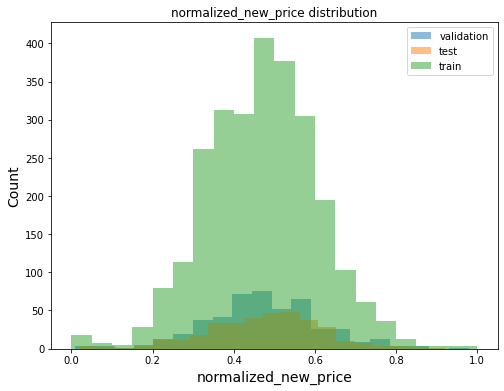

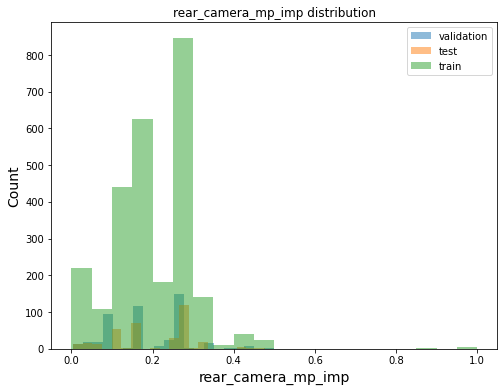

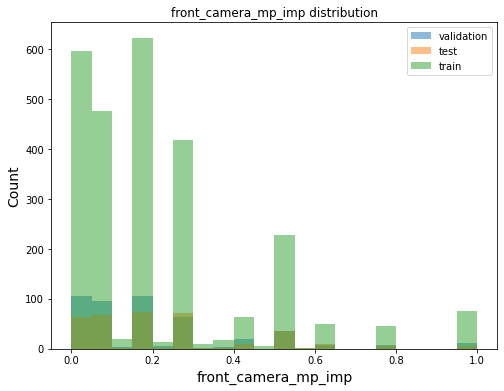

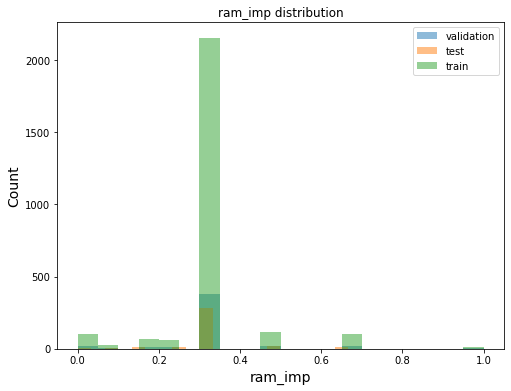

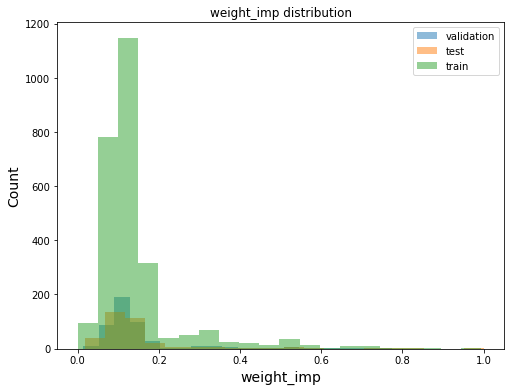

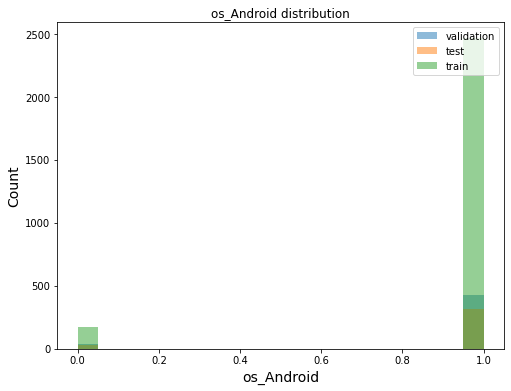

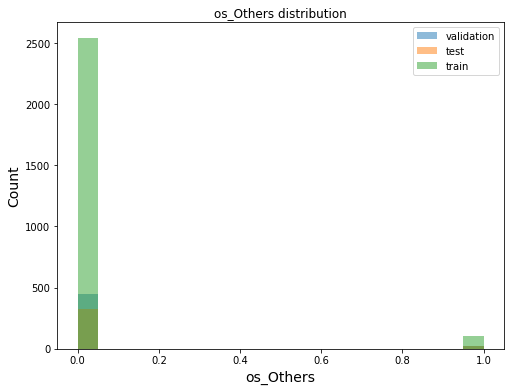

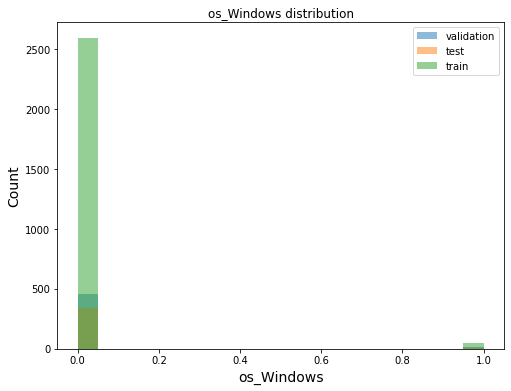

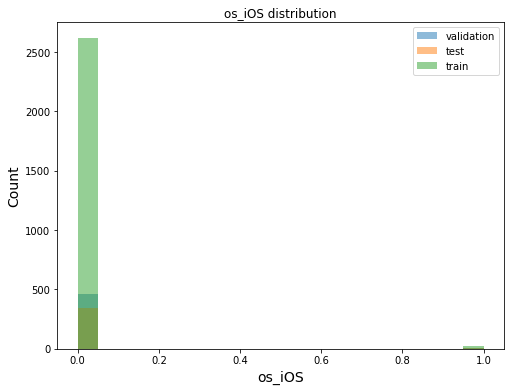

In [279]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

X_val_plot = X_val[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

X_train_plot = X_train[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

**LINEAR REGRESSION**

In [280]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [281]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

# **Making predictions**

In [282]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.00
Coefficient of determination: 0.84
R^2 score on tarining set = 0.8370525184207447


In [283]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.00
Coefficient of determination: 0.86
R^2 score on test set = 0.8593631215360013


In [284]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.00
Coefficient of determination: 0.84
R^2 score on validation set = 0.843254789777807


**Understanding the important features**

In [285]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.5029 ± 0.0311,normalized_new_price
0.0596 ± 0.0168,screen_size
0.0457 ± 0.0195,front_camera_mp_imp
0.0436 ± 0.0066,rear_camera_mp_imp
0.0312 ± 0.0020,weight_imp
0.0174 ± 0.0098,release_year
0.0033 ± 0.0009,4g
0.0032 ± 0.0025,ram_imp
0.0008 ± 0.0004,os_iOS
0.0008 ± 0.0007,os_Android


Here, we can see that normalized_new_price is the most significant feature followed by screen_size etc.os_others, 5g, os_windows with smaller weight seem to have smaller impact on the model's predictions

**RIDGE REGRESSION**

In [286]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
X_train_pred_ridge = ridge_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_ridge))
print("R2 Score : ",r2_score(y_train,X_train_pred_ridge))

MSE :  0.0021740163178426476
R2 Score :  0.8368716872796917


In [287]:
data.head()

,screen_size,4g,5g,release_year,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand,os_Android,os_Others,os_Windows,os_iOS
0,0.367538,1.0,0.0,1.0,0.035892,0.545139,0.366665,0.269616,0.15625,0.062491,0.248748,0.273319,0.097964,0.764467,1.0,0.0,0.0,0.0
1,0.476785,1.0,1.0,1.0,0.233300,0.713268,0.529190,0.269616,0.50000,0.124991,0.666110,0.412148,0.183206,0.764467,1.0,0.0,0.0,0.0
2,0.452985,1.0,1.0,1.0,0.070788,0.703231,0.603105,0.269616,0.25000,0.124991,0.666110,0.401302,0.183206,0.764467,1.0,0.0,0.0,0.0
3,0.796723,1.0,1.0,1.0,0.253240,0.708012,0.551821,0.269616,0.25000,0.062491,0.499165,0.732104,0.522901,0.764467,1.0,0.0,0.0,0.0
4,0.399532,1.0,0.0,1.0,0.201396,0.561356,0.413717,0.269616,0.25000,0.062491,0.248748,0.488069,0.147583,0.764467,1.0,0.0,0.0,0.0


Now, lets answer the questions:

* What are the data types? (Only numeric and categorical)
         Numeric: screen_size,front_camera_mp,back_camera_mp, internal_memory,ram, battery,weight,release_year, days_used,normalized_new_price, normalized_used_price (TARGET)refurbished device

Categorical:

device_brand: Name of manufacturing brand, 
os,
4g,
5g 

* Are there missing values? 
  Yes, there are missing values in "rear_camera_mp" "front_camera_mp", "internal_memory", "ram", "battery","weight"

* What are the likely distributions of the numeric variables?

 Normalized_new_price follows normal distribution

* Which independent variables are useful to predict a target (dependent variable)? 
['screen_size', '4g', '5g', 'release_year', 'days_used',  
                                              'normalized_new_price', 'rear_camera_mp_imp','front_camera_mp_imp', 'internal_memory_imp', 
'ram_imp', 'battery_imp', 'weight_imp', 'Device_Brand', 'os_Android', 
'os_Others', 'os_Windows', 'os_iOS'] are significant in predicting the target.

* Which independent variables have missing data? How much? 
       rear_camera_mp" "front_camera_mp", "internal_memory", "ram",   "battery","weight" have missing data. Though 'rear_camera_mp' and 'weight' have significant amount of missing data.

* Do the training and test sets have the same data?
No. Training = 76.5% of data,
 Validation = 13.5% of data and 
 Test set = 10% of data

* In the predictor variables independent of all the other predictor variables?

battery_imp(0.81) and weight_imp(0.83) are slightly correlated with screen_size.



* Which predictor variables are the most important?

A.

normalized_new_price is the most significant feature followed by screen_size etc.os_others, 5g, os_windows with smaller weight seem to have smaller impact on the model's predictions




* Do the ranges of the predictor variables make sense?

A. 

Screen_size, normalozed_new_price, ram, weight have a few outliers and that makes sense because tablets and phones come in different sizes and prices these days depending on the brand and the model and version. 


4g enabled/5g enabled have 0/1 as their values and that is what we knew as it was boolean before and we used one hot encoding to convert it into 0s and 1s. 

There are several brands and we have used median values of the respective brand's normalized_used_price to convert this categorical feature into numerical feature

os is of 4 categories Android/ios/Windows and others and we have converted these into dummy columns to convert this catgeorical feature again into a numerical feature and thus this will have only 0/1 s. 






* What are the distributions of the predictor variables?  

A. 

Only normalized_new_price and normalized_used_price(our targte) follows normal distribution. None of the other variables seem to be following any



* Remove outliers and keep outliers (does if have an effect of the final predictive model)?



In [288]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(data, threshold=3):
    """
    Remove outliers from a Pandas DataFrame using the Z-score method.
    :param data: A Pandas DataFrame.
    :param threshold: The Z-score threshold for determining outliers.
    :return: The DataFrame with outliers removed.
    """
    # Calculate the Z-scores of the columns
    z = np.abs(data - data.mean()) / data.std()
    # Create a mask to identify the rows with Z-scores greater than the threshold
    mask = (z < threshold).all(axis=1)
    # Return the DataFrame with outliers removed
    return data[mask]

# Load the data into a Pandas DataFrame
data = data

# Remove the outliers using the Z-score method
filtered_data = remove_outliers_zscore(data)


In [289]:
filtered_data.head()

,screen_size,4g,5g,release_year,days_used,normalized_used_price,normalized_new_price,rear_camera_mp_imp,front_camera_mp_imp,internal_memory_imp,ram_imp,battery_imp,weight_imp,Device_Brand,os_Android,os_Others,os_Windows,os_iOS
0,0.367538,1.0,0.0,1.0,0.035892,0.545139,0.366665,0.269616,0.15625,0.062491,0.248748,0.273319,0.097964,0.764467,1.0,0.0,0.0,0.0
4,0.399532,1.0,0.0,1.0,0.201396,0.561356,0.413717,0.269616,0.25000,0.062491,0.248748,0.488069,0.147583,0.764467,1.0,0.0,0.0,0.0
5,0.435037,1.0,0.0,1.0,0.131605,0.566057,0.436533,0.269616,0.25000,0.062491,0.332220,0.379610,0.136132,0.764467,1.0,0.0,0.0,0.0
6,0.341787,1.0,0.0,1.0,0.142572,0.460671,0.327012,0.165275,0.15625,0.031241,0.165275,0.273319,0.095420,0.764467,1.0,0.0,0.0,0.0
7,0.417089,1.0,0.0,1.0,0.127617,0.628138,0.462416,0.269616,0.25000,0.062491,0.332220,0.314534,0.120865,0.764467,1.0,0.0,0.0,0.0


## BUILDING THE MODEL - without outliers

Significant features are: 'screen_size', '4g', '5g', 'release_year',
'normalized_new_price', 'rear_camera_mp_imp', 'front_camera_mp_imp',
'ram_imp', 'weight_imp', 'os_Android', 'os_Others', 'os_Windows', 'os_iOS'

Train Validation and Test split

In [290]:
from sklearn.model_selection import  train_test_split

X = filtered_data[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

y = filtered_data['normalized_used_price']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


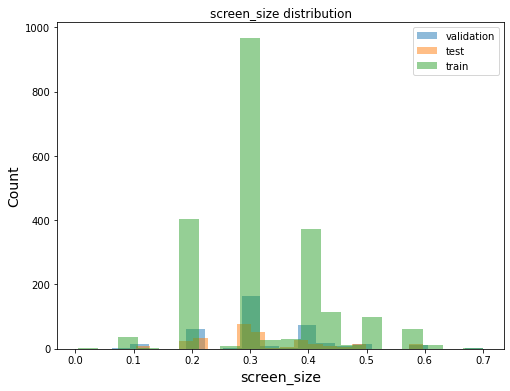

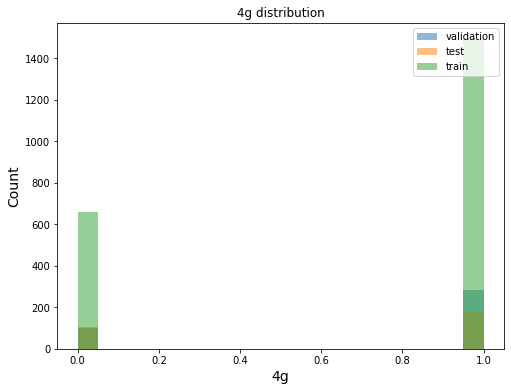

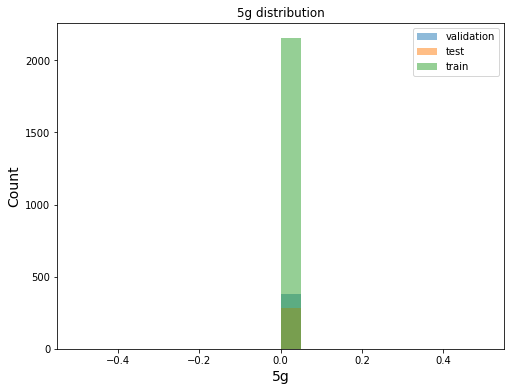

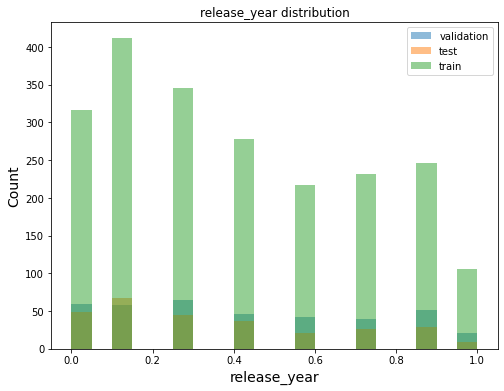

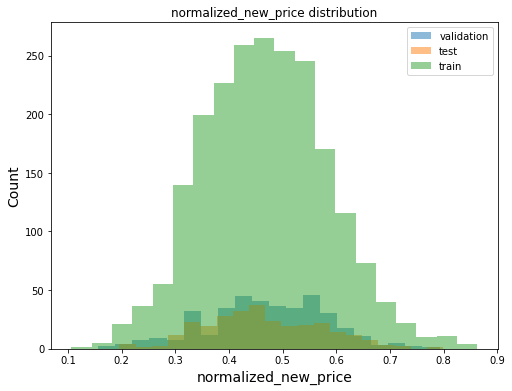

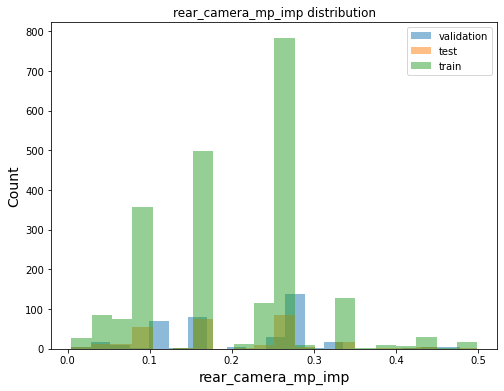

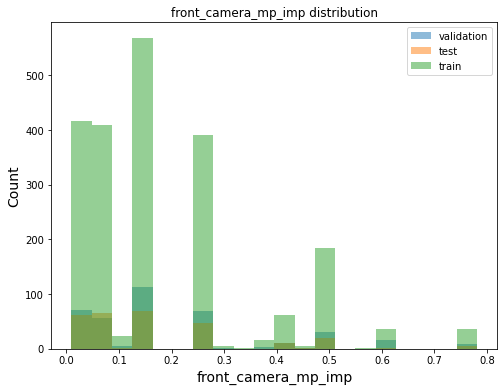

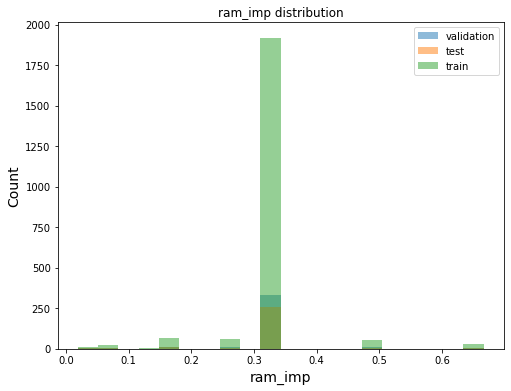

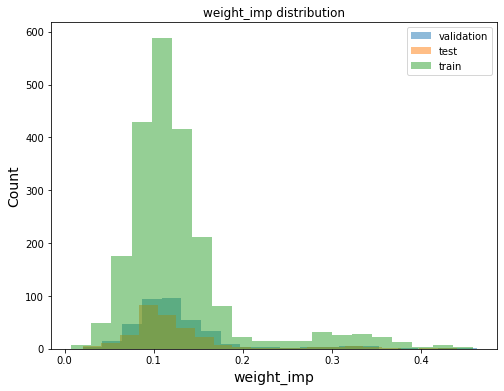

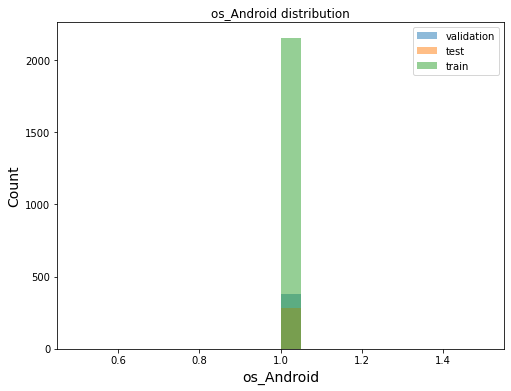

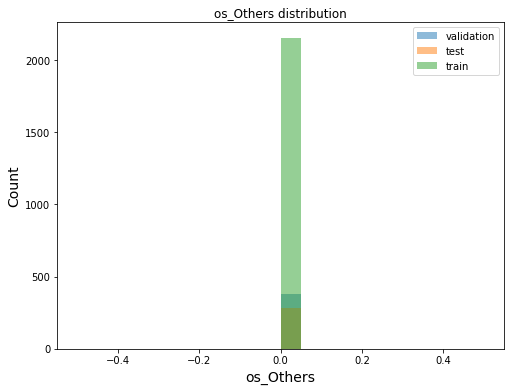

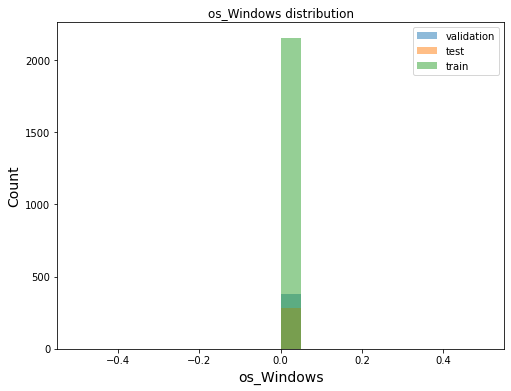

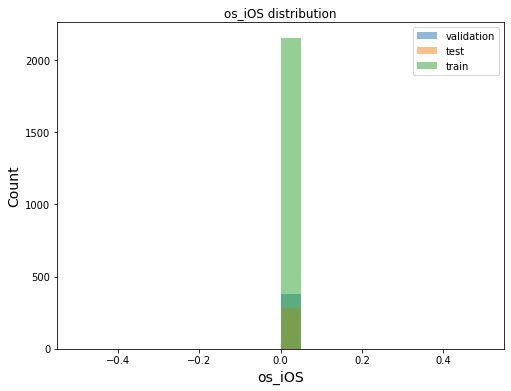

In [291]:
# Looking the data for test, training and validation set
X_test_plot = X_test[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

X_val_plot = X_val[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

X_train_plot = X_train[['screen_size', '4g', '5g', 'release_year', 
                                                     
                                                   'normalized_new_price', 'rear_camera_mp_imp', 
                                                   'front_camera_mp_imp', 
                                                   'ram_imp',  
                                                   'weight_imp',  'os_Android', 
                                                   'os_Others', 'os_Windows', 'os_iOS']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

**LINEAR REGRESSION**

In [292]:
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

In [293]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

**Making predictions-without outliers**

In [294]:
# Make predictions using the training set
y_pred = regr.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.00
Coefficient of determination: 0.79
R^2 score on tarining set = 0.7857087328251808


In [295]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))
r2 = r2_score(y_test,y_pred)
print('R^2 score on test set =',r2)

Mean squared error: 0.00
Coefficient of determination: 0.79
R^2 score on test set = 0.7919084562151362


In [296]:
# Make predictions using the validation set
y_pred = regr.predict(X_val)

# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))
r2_val = r2_score(y_val,y_pred)
print('R^2 score on validation set =',r2_val)

Mean squared error: 0.00
Coefficient of determination: 0.79
R^2 score on validation set = 0.7932177033375042


**Understanding the important features**

In [297]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(regr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3320 ± 0.0476,normalized_new_price
0.1042 ± 0.0183,rear_camera_mp_imp
0.0866 ± 0.0172,front_camera_mp_imp
0.0518 ± 0.0126,weight_imp
0.0473 ± 0.0122,screen_size
0.0081 ± 0.0048,release_year
0.0074 ± 0.0044,4g
0.0029 ± 0.0032,ram_imp
0 ± 0.0000,os_iOS
0 ± 0.0000,os_Windows


Notes:
So, when outliers were there,
**Train** 
Mean Squared error is:0.0
Coeffient of determination is:0.84
R^2 score: 0.836..

**Test**
Mean Squared error is: 0.00
Coeffient of determination is: 0.86
R^2 score: 0.8582..

**Validation**
Mean Squared error is: 0.00
Coeffient of determination is: 0.84
R^2 score: 0.844

**Outliers removed**:

**Train** 
Mean squared error: 0.00
Coefficient of determination: 0.78
R^2 score on tarining set = 0.7845560603840412

**Test**
Mean squared error: 0.00
Coefficient of determination: 0.80
R^2 score on test set = 0.7973628008744311

**Validation**
Mean squared error: 0.00
Coefficient of determination: 0.80
R^2 score on validation set = 0.8021628612196701

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [298]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error

def remove_and_impute(df, percentage):
   
    missing_rows = np.random.choice(df.index, int(len(df) * percentage), replace=False)
    df_missing = df.loc[missing_rows]
    df = df.drop(missing_rows)
    
   
    mean_imp = SimpleImputer(strategy='mean')
    median_imp = SimpleImputer(strategy='median')
    freq_imp = SimpleImputer(strategy='most_frequent')
    
    df_mean = mean_imp.fit_transform(df_missing)
    df_median = median_imp.fit_transform(df_missing)
    df_freq = freq_imp.fit_transform(df_missing)
    

    mse_mean = mean_squared_error(df_missing, df_mean)
    mae_mean = mean_absolute_error(df_missing, df_mean)
    mse_median = mean_squared_error(df_missing, df_median)
    mae_median = mean_absolute_error(df_missing, df_median)
    mse_freq = mean_squared_error(df_missing, df_freq)
    mae_freq = mean_absolute_error(df_missing, df_freq)
    

    print("Percentage of data missing: {:.1f}%".format(percentage * 100))
    print("Mean imputation:")
    print("MSE: {:.2f}".format(mse_mean))
    print("MAE: {:.2f}".format(mae_mean))
    print("Median imputation:")
    print("MSE: {:.2f}".format(mse_median))
    print("MAE: {:.2f}".format(mae_median))
    print("Most frequent imputation:")
    print("MSE: {:.2f}".format(mse_freq))
    print("MAE: {:.2f}".format(mae_freq))
    print()


df = data
for percentage in [0.01, 0.05, 0.1]:
    remove_and_impute(df, percentage)


Percentage of data missing: 1.0%
Mean imputation:
MSE: 0.00
MAE: 0.00
Median imputation:
MSE: 0.00
MAE: 0.00
Most frequent imputation:
MSE: 0.00
MAE: 0.00

Percentage of data missing: 5.0%
Mean imputation:
MSE: 0.00
MAE: 0.00
Median imputation:
MSE: 0.00
MAE: 0.00
Most frequent imputation:
MSE: 0.00
MAE: 0.00

Percentage of data missing: 10.0%
Mean imputation:
MSE: 0.00
MAE: 0.00
Median imputation:
MSE: 0.00
MAE: 0.00
Most frequent imputation:
MSE: 0.00
MAE: 0.00



**Refernces**

*   Eli5 official documentation
*   Refered Towards Data Science
*   Sckit learn offcial documentation
*   https://seaborn.pydata.org/
*   https://pandas.pydata.org/docs/user_guide/visualization.html
*  https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression/notebook

*   https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb














LICENSE:
This work is a part of an academic assignment by Lakshmi GayatriAishwarya Adduri.(NU ID: 002738716)